# Домашнее задание

In [10]:
import scipy.stats as sps
import numpy as np

Задание 1 [5 баллов]. Дана функция $f(x) = C * exp(cos(x))*sin(x)$ на интервале $I\{x \in [0, \pi] = [a, b]\}$.
При этом $f(x) = 0$ вне указанного интервала

1. Определите значение константы C, при которой данная функция является плотностью распределения.
2. Изобразите графически функцию плотности.
3. Рассчитайте формулу для функции распределения и изобразите её графически.
4. Рассчитайте значение математического ожидания (подсказка - может помочь scipy.integrate)
5. Проверьте центральную предельную теорему для данного распределения.

### 1

По уловию нормировки

$$\int_{-\infty}^{+\infty}C \cdot f(x) = C\cdot\int_{-\infty}^{+\infty}f(x) = C\cdot\int_{0}^{\pi}e^{cos(x)}sin(x)dx = -C\cdot\int_{0}^{\pi}e^{cos(x)}d cos(x) = -C\cdot e^{cos(x)}|_{0}^{\pi} = C\cdot(e - \frac{1}{e}) \approx C\cdot2.3504 = 1$$

$$C = 0.4255$$

### 2

In [44]:
import matplotlib.pyplot as plt

In [51]:
def f(x):
    if x < 0:
        return 0
    elif x <= np.pi:
        return 0.4255 * np.exp(np.cos(x))*np.sin(x)
    return 0

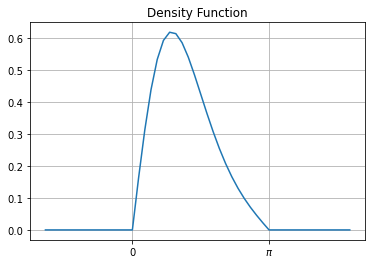

In [54]:
x = np.linspace(-2, 5, 50)

y = [f(i) for i in x]
plt.grid()
plt.xticks([0, np.pi], ['0', '$\pi$'])
plt.plot(x, y)
plt.title('Density Function');

### 3

$$F(x) = \int_{-\infty}^{x}f(x)dx$$

$$\begin{equation*}
F(x) = 
 \begin{cases}
   \int_{-\infty}^{x}0dx = 0 &, x\leq 0 \\
   \int_{-\infty}^{0}0dx+\int_{0}^{x}0.4255e^{cos(x)}sin(x)dx = 0.4255(e-e^{cos(x)}) &, 0 < x \leq \pi \\
   \int_{-\infty}^{0}0dx+\int_{0}^{\pi}0.4255e^{cos(x)}sin(x)dx + \int_{\pi}^{x}0dx = 1 & x > \pi
 \end{cases}
\end{equation*}$$

In [58]:
def F(x):
    if x <= 0:
        return 0
    elif x <= np.pi:
        return 0.4255*(np.exp(1) - np.exp(np.cos(x)))
    return 1

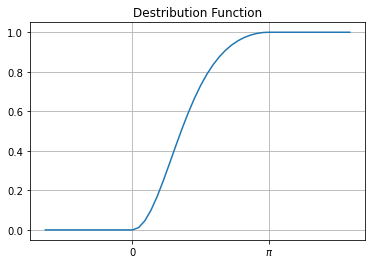

In [59]:
x = np.linspace(-2, 5, 50)

y = [F(i) for i in x]
plt.grid()
plt.xticks([0, np.pi], ['0', '$\pi$'])
plt.plot(x, y)
plt.title('Destribution Function');

### 4

$$M[X] = \int_{-\infty}^{+\infty}xf(x)dx$$

In [60]:
from scipy import integrate

In [61]:
integrate.quad(lambda x: x*f(x), 0, np.pi)

(1.2006486300094457, 8.728452687178591e-11)

$$M[X] = 1.20065$$

### 5

In [72]:
import seaborn as sns

In [71]:
class my_gen(sps.rv_continuous):
    def _pdf(self, x):
        return 0.4255 * np.exp(np.cos(x))*np.sin(x)
    
my_gen(a=0, b=np.pi).rvs(size=5)

array([1.23463481, 0.25145252, 0.57064141, 0.66758841, 2.8119577 ])

In [84]:
%%time
avg_list = []
for _ in range(200):
    avg = my_gen(a=0, b=np.pi).rvs(size=300).mean()
    avg_list.append(avg)

Wall time: 1min 29s


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


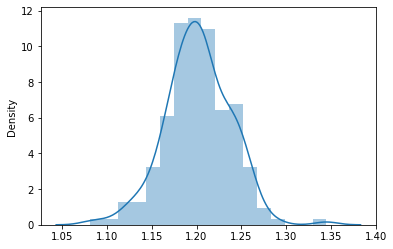

In [85]:
sns.distplot(avg_list);

Задание 2 [5 баллов]. Сгенерируйте 3 выборки из 3 различных распределений размерностью 1000, 50 000, 750 000

1. Рассчитайте основные статистические показатели для каждой из выборок и сравните их с теоретическими показателями выбранных вами распределений. Должны быть посчитаны:
- среднее
- дисперсия
2. Проверьте критерий Колмогорова для 3 выборок.
3. Для каждой пары выборок (всего будет 3) проверьте критерий Манна-Уитни.

### 1

#### бета

In [151]:
a, b = 3, 5
stat1 = sps.beta(a, b)

print('бета')
print(f"Ожидаемое матожидание: {a / (a+b)}")
print(f"Ожидаемая дисперсия: {(a*b / (a+b)**2 / (a+b+1))}")

for s in [1000, 50000, 750000]:
    sample = stat1.rvs(size=s)
    print(f"\nРазмер выборки: {s}")
    print('\tВыборочное среденее: %.3f' % sample.mean())
    print('\tВыборочная дисперсия: %.3f' % sample.var())

бета
Ожидаемое матожидание: 0.375
Ожидаемая дисперсия: 0.026041666666666668

Размер выборки: 1000
	Выборочное среденее: 0.367
	Выборочная дисперсия: 0.027

Размер выборки: 50000
	Выборочное среденее: 0.374
	Выборочная дисперсия: 0.026

Размер выборки: 750000
	Выборочное среденее: 0.375
	Выборочная дисперсия: 0.026


#### Логнормальное

In [148]:
sigma = 2
stat2 = sps.lognorm(sigma)

print('Логнормальное')
print(f"Ожидаемое матожидание: {np.exp(sigma**2 / 2)}")
print(f"Ожидаемая дисперсия: {np.exp(2*sigma**2) - np.exp(sigma**2)}")

for s in [1000, 50000, 750000]:
    sample = stat2.rvs(size=s)
    print(f"\nРазмер выборки: {s}")
    print('\tВыборочное среденее: %.3f' % sample.mean())
    print('\tВыборочная дисперсия: %.3f' % sample.var())

Логнормальное
Ожидаемое матожидание: 7.38905609893065
Ожидаемая дисперсия: 2926.3598370085842

Размер выборки: 1000
	Выборочное среденее: 7.426
	Выборочная дисперсия: 1145.401

Размер выборки: 50000
	Выборочное среденее: 6.935
	Выборочная дисперсия: 1520.885

Размер выборки: 750000
	Выборочное среденее: 7.456
	Выборочная дисперсия: 3303.001


#### Нормальное

In [149]:
loc, scale = 10, 20
stat3 = sps.norm(loc=loc, scale=scale)

print('Нормальное')
print(f"Ожидаемое матожидание: {loc}")
print(f"Ожидаемая дисперсия: {scale**2}")

for s in [1000, 50000, 750000]:
    sample = stat3.rvs(size=s)
    print(f"\nРазмер выборки: {s}")
    print('\tВыборочное среденее: %.3f' % sample.mean())
    print('\tВыборочная дисперсия: %.3f' % sample.var())

Нормальное
Ожидаемое матожидание: 10
Ожидаемая дисперсия: 400

Размер выборки: 1000
	Выборочное среденее: 9.486
	Выборочная дисперсия: 419.303

Размер выборки: 50000
	Выборочное среденее: 10.076
	Выборочная дисперсия: 401.843

Размер выборки: 750000
	Выборочное среденее: 9.958
	Выборочная дисперсия: 400.172


### 2

In [103]:
from scipy.stats import kstest

#### Проверка для бета

In [150]:
data = stat1.rvs(size=100)
kstest(data, "norm")

KstestResult(statistic=0.5386878045035642, pvalue=1.1192043261762322e-27)

p << 0.05 => точно не норамальное

In [152]:
data = stat1.rvs(size=500)
kstest(data, "beta", [3, 5])

KstestResult(statistic=0.03588140881462498, pvalue=0.5284998080716917)

#### Проверка для логнормального 

In [153]:
data = stat2.rvs(size=100)
kstest(data, "norm")

KstestResult(statistic=0.5054950155155687, pvalue=3.429308289615299e-24)

p << 0.05 => точно не норамальное

In [154]:
data = stat2.rvs(size=100)
kstest(data, "lognorm", [2])

KstestResult(statistic=0.04918506460139893, pvalue=0.959118132345253)

#### Проверка для норального 

In [155]:
data = stat3.rvs(size=500)
kstest(data, "norm", [10, 20])

KstestResult(statistic=0.02425084791845533, pvalue=0.92333349068235)

### 3

#### Бета и логнормальное

In [160]:
data1 = stat1.rvs(size=500)
data2 = stat2.rvs(size=500)

In [161]:
sps.mannwhitneyu(data1, data2)

MannwhitneyuResult(statistic=64795.0, pvalue=1.0912495285524584e-39)

меньше 0.05, можем отвергнуть гипотезу

#### нормальное и логнормальное

In [162]:
data1 = stat3.rvs(size=500)
data2 = stat2.rvs(size=500)

In [163]:
sps.mannwhitneyu(data1, data2)

MannwhitneyuResult(statistic=148488.0, pvalue=2.699792802027844e-07)

меньше 0.05, можем отвергнуть гипотезу

#### Бета и нормальное

In [164]:
data1 = stat1.rvs(size=500)
data2 = stat3.rvs(size=500)

In [165]:
sps.mannwhitneyu(data1, data2)

MannwhitneyuResult(statistic=81061.0, pvalue=6.479394656536171e-22)

меньше 0.05, можем отвергнуть гипотезу